In [1]:
from omega_a_fitting import *
from fit_util import *
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/9Day539AClustersCoincidences.root ")
f.cd("clustersAndCoincidences")
f.ls()

TFile**		./data/9Day539AClustersCoincidences.root	
 TFile*		./data/9Day539AClustersCoincidences.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesRand;1	clustersAndCoincidencesRand (ClusterAndCoincidenceHistograms) folder


In [3]:
clusters = f.Get("clustersAndCoincidences").Get("clusters")
clusters.Rebin3D(6,1,1)
print("Binning:", clusters.GetNbinsX(),clusters.GetNbinsY(),clusters.GetNbinsZ())

Binning: 4691 300 24


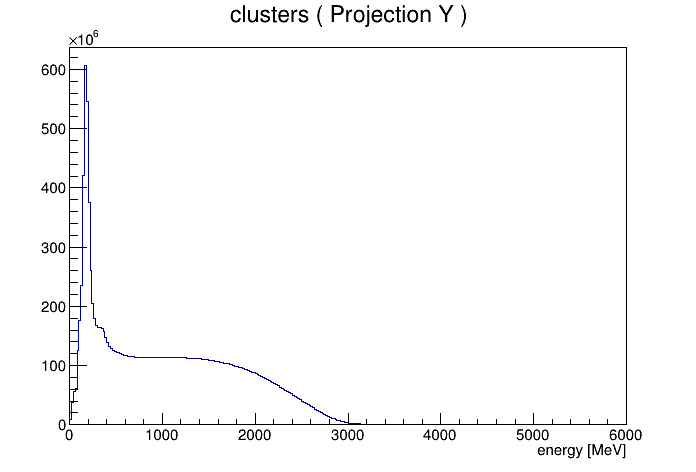

In [4]:
c = r.TCanvas()
clusters.ProjectionY().Draw()
c.Draw()

In [5]:
e1 = 1700
e2 = 3500
calo = 0

wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)
#wiggle = MakeWiggleFromTH2(clusters, e1, e2, calo, 1, True)

In [6]:
DumpClass(wiggle)

Dumping:  <omega_a_fitting.MakeWiggleFromTH3 object at 0x7fe055531be0>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH3'>
    elow = 1700
    ehigh = 3500
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = False
    BinOrEnergy = energy
    title = Wiggle Plot for [1700 < E (MeV) < 3500] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1700_3500_0") at 0x7fffcc49b210>


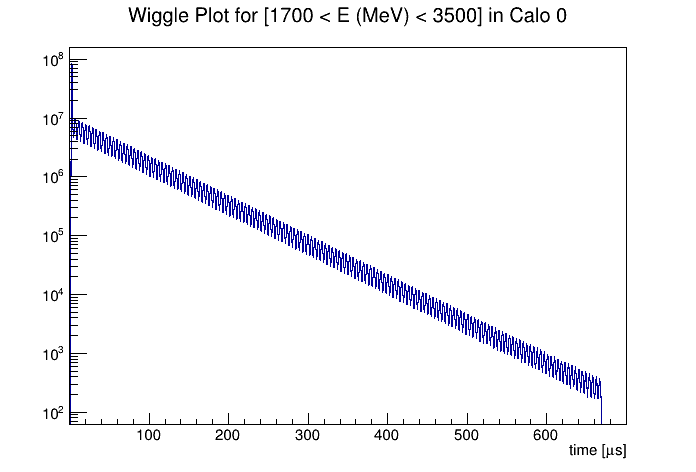

In [7]:
c = r.TCanvas()
wiggle.h.Draw()
c.SetLogy()
c.Draw()

---

### Now fit the wiggle plot

In [8]:
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [9]:
DumpClass(fitFunc)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7fe055540550>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7fe055540518>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit object at 0x7fe055540550>>}
    cboAmplitudeModel = None
    cboFrequencyModel = None
    isCBOFree = True
    customFunction = 

In [10]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [11]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
fit.SetParameters([700000,64.4,0.33,-33,5.11])
fit.SetParNames()

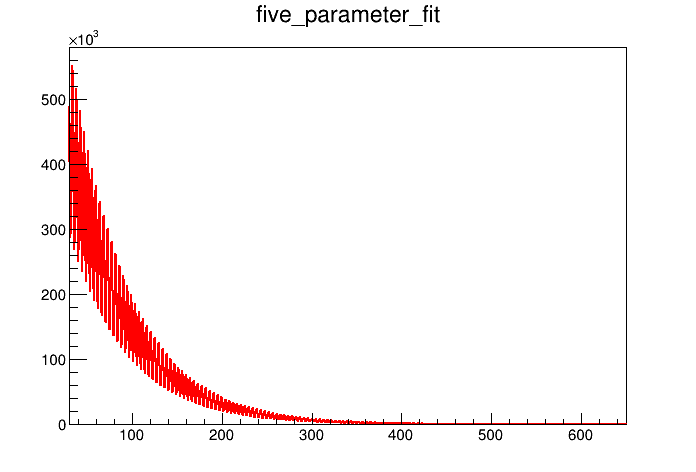

In [12]:
c = r.TCanvas()
fit.f.Draw()
c.Draw()

In [13]:
fitter = WiggleFitter(wiggle.h, fit, "5par", "R", 1)

In [14]:
fitter.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  12876.419062644356 / 4150 = 3.102751581360086
      N  =  7884223.716350108 +/- 306.28649193984916
      #tau_{#mu}  =  64.39681097355418 +/- 0.0014097688813638767
      A  =  -0.37095983119307085 +/- 2.855007567482273e-05
      R  =  -47.08247229854112 +/- 0.870498674227159
      #phi_{a}  =  2.0807841674635488 +/- 0.0001417153639826404
 FCN=12876.4 FROM MIGRAD    STATUS=CONVERGED     305 CALLS         306 TOTAL
                     EDM=2.75183e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            7.88422e+06   3.06286e+02   1.35461e+01   6.05439e-09
   2  #tau_{#mu}   6.43968e+01   1.40977e-03  -3.95678e-05  -4.80141e-01
   3  A           -3.70960e-01   2.85501e-05  -1.12669e-07   4.28598e+00
   4  R           -4.70825e+01   8.70499e-01   2.47944e-02  -9.

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [15]:
DumpClass(fitter)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fe055540eb8>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("5par") at 0x7fffcc5fb190>
    f = <ROOT.TF1 object ("5par_fitter") at 0x7fffcc633980>
    name = 5par_fitter
    nPar = 5
    fitOptions = R
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7884223.716350108, 64.39681097355418, -0.37095983119307085, -47.08247229854112, 2.0807841674635488]]
    intermediateErrors = [[306.28649193984916, 0.0014097688813638767, 2.855007567482273e-05, 0.870498674227159, 0.0001417153639826404]]
    intermediateChi2 = [3.102751581360086]
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffcc6a43d0>
    resid = <ROOT.TH1D object ("h_resid_5par_fitter") at 0x7fffcc7eddc0>
    fft = None


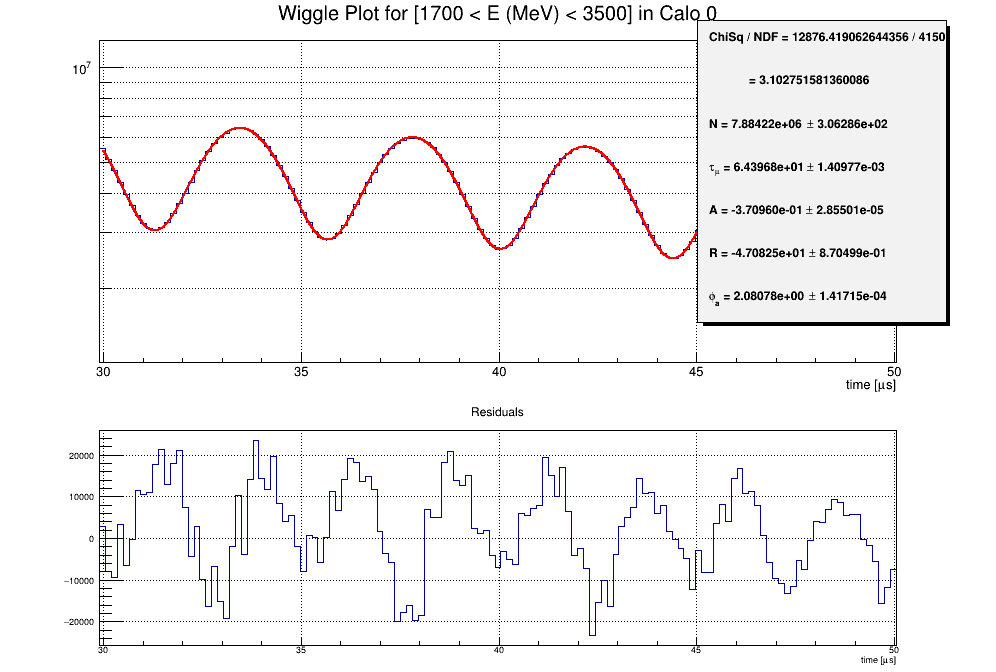

In [16]:
c = fitter.Draw(30,50)

0.23 0.01 623.9719053953861
0.37 0.01 623.9719053953861
2.1 0.01 623.9719053953861
[<ROOT.TLine object ("TLine") at 0x7fe0540d5440>, <ROOT.TLine object ("TLine") at 0x7fe0540b6c20>, <ROOT.TLine object ("TLine") at 0x7fe0540e33e0>]
<ROOT.TLine object ("TLine") at 0x7fe0540d5440>
<ROOT.TLine object ("TLine") at 0x7fe0540b6c20>
<ROOT.TLine object ("TLine") at 0x7fe0540e33e0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


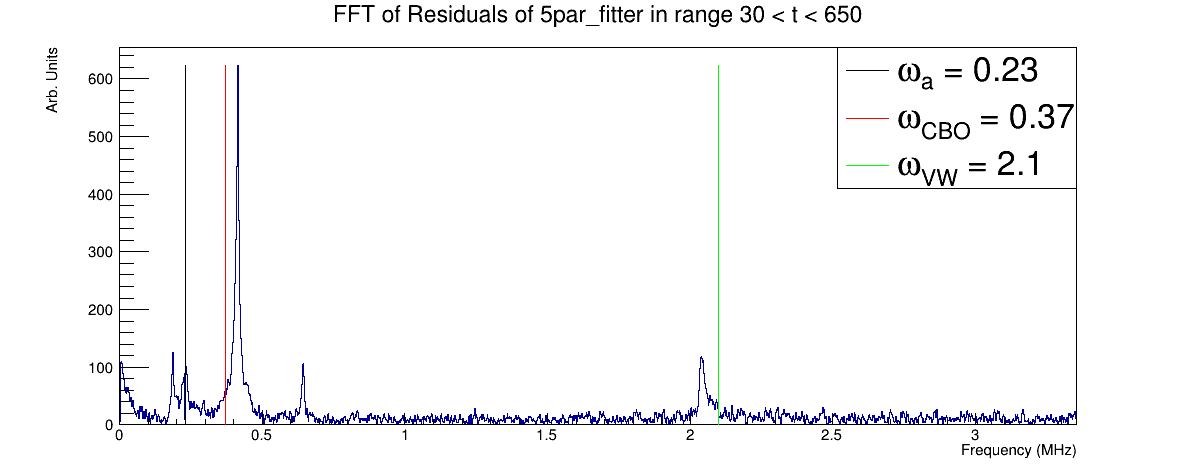

In [20]:
c = fitter.DrawFFT([0.23,0.37, 2.1],["#omega_{a}", "#omega_{CBO}", "#omega_{VW}"])

In [18]:
print([x for x in c.GetListOfPrimitives()])

[<ROOT.TFrame object ("TFrame") at 0x7fe05410bdc0>, <ROOT.TH1D object ("out_MAG P") at 0x7fffcb91cd80>, <ROOT.TLine object ("TLine") at 0x7fe0540d5440>, <ROOT.TLine object ("TLine") at 0x7fe0540e33e0>, <ROOT.TLine object ("TLine") at 0x7fe0540d5440>, <ROOT.TLine object ("TLine") at 0x7fe0540e33e0>, <ROOT.TLegend object ("TPave") at 0x7fe0540d5f70>, <ROOT.TPaveText object ("title") at 0x7fe0540d8420>]
